# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
! pip install citipy


  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=c78f75b17a4286db6421e88bb4178d416fdf5410ad695364c1a18cba60911fed
  Stored in directory: c:\users\kyleb\appdata\local\pip\cache\wheels\41\82\37\8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
         
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tralee
Processing Record 2 of Set 1 | battle ground
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | roxas
Processing Record 6 of Set 1 | cam ranh
Processing Record 7 of Set 1 | nemuro
Processing Record 8 of Set 1 | severo-yeniseyskiy
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | yangor
City not found. Skipping...
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | ekibastuz
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | kununurra
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | utrik
Processing Record 18 of Set 1 | usinsk
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | juneau
Processing Record 21 of Set 1 | bubaque
Processing Record 22 of Set 1 | puerto natales

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tralee,52.2704,-9.7026,11.99,93,6,1.48,IE,1693633377
1,battle ground,45.7809,-122.5334,21.61,82,17,1.34,US,1693633186
2,blackmans bay,-43.0167,147.3167,14.83,70,51,2.24,AU,1693633377
3,bethel,41.3712,-73.4140,15.36,86,0,0.00,US,1693633377
4,roxas,11.5853,122.7511,32.30,64,100,2.39,PH,1693633378


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tralee,52.2704,-9.7026,11.99,93,6,1.48,IE,1693633377
1,battle ground,45.7809,-122.5334,21.61,82,17,1.34,US,1693633186
2,blackmans bay,-43.0167,147.3167,14.83,70,51,2.24,AU,1693633377
3,bethel,41.3712,-73.4140,15.36,86,0,0.00,US,1693633377
4,roxas,11.5853,122.7511,32.30,64,100,2.39,PH,1693633378


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

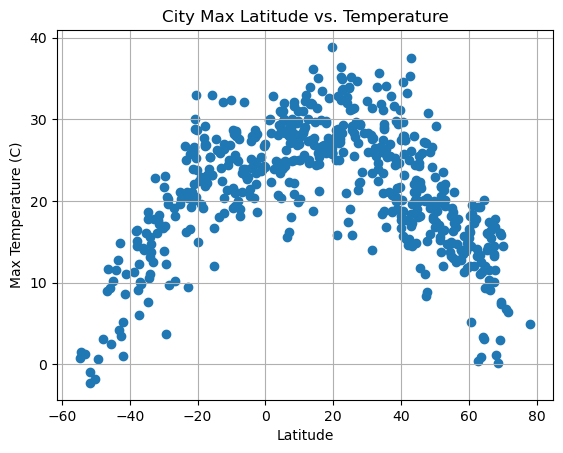

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

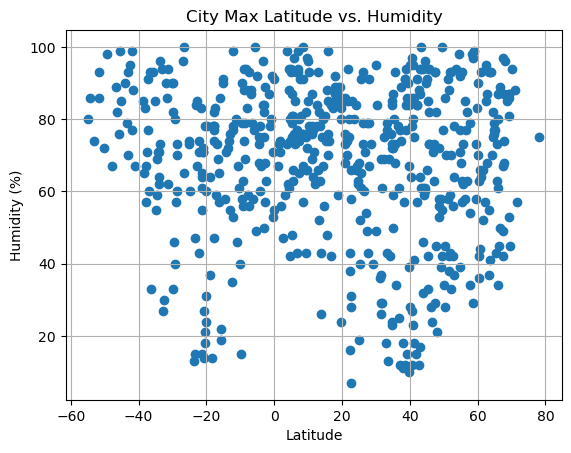

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

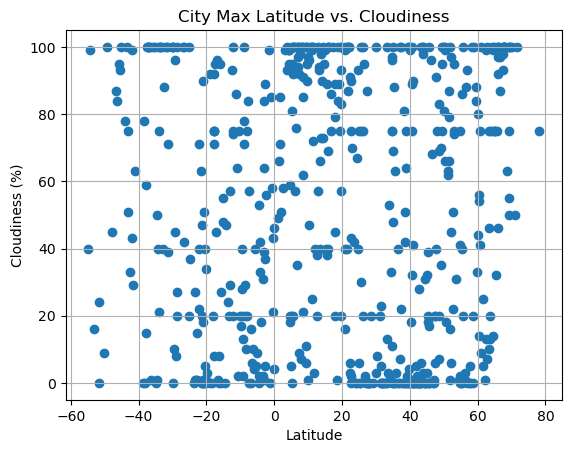

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

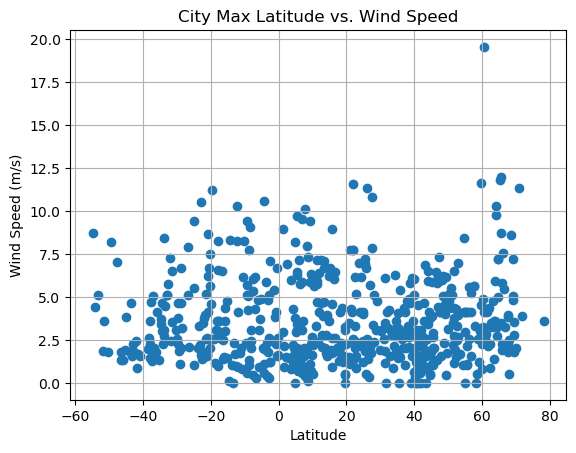

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def lr_function(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")

                                                                   

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tralee,52.2704,-9.7026,11.99,93,6,1.48,IE,1693633377
1,battle ground,45.7809,-122.5334,21.61,82,17,1.34,US,1693633186
3,bethel,41.3712,-73.4140,15.36,86,0,0.00,US,1693633377
4,roxas,11.5853,122.7511,32.30,64,100,2.39,PH,1693633378
5,cam ranh,11.9214,109.1591,32.98,62,40,4.12,VN,1693633378


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,14.83,70,51,2.24,AU,1693633377
12,waitangi,-43.9535,-176.5597,11.57,90,78,1.79,NZ,1693633380
13,kununurra,-15.7667,128.7333,32.99,19,27,3.60,AU,1693633380
14,port-aux-francais,-49.3500,70.2167,0.66,98,100,8.18,TF,1693633380
17,port lincoln,-34.7333,135.8667,18.59,55,0,3.70,AU,1693633381


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7070855954982167


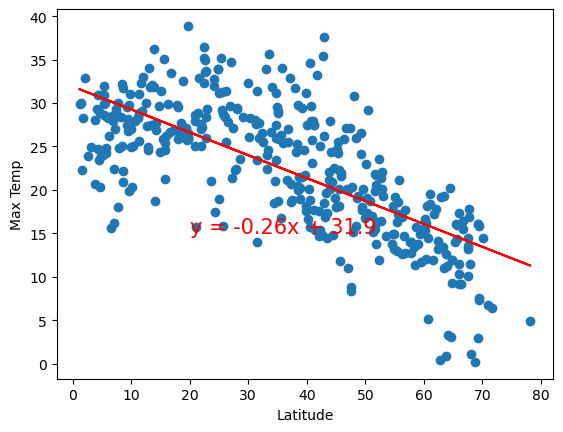

In [19]:
# Linear regression on Northern Hemisphere
y_values = northern_hemi_df["Max Temp"]
x_values = northern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()


The r-squared is: 0.7969966578705022


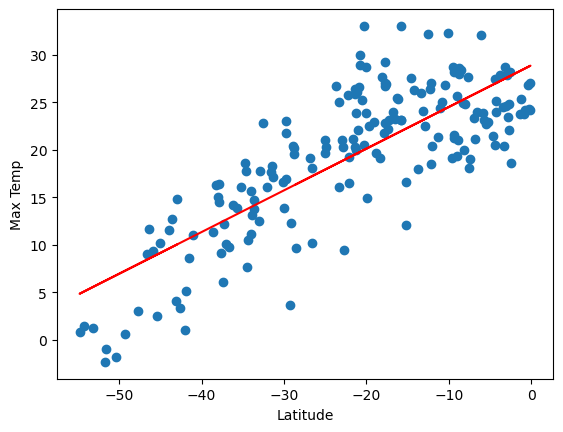

In [20]:
# Linear regression on Southern Hemisphere
y_values = southern_hemi_df["Max Temp"]
x_values = southern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** For the northern hemisphere, the correlation between latitude and max temp is moderately negative, while the southern hempisphere is slightly more moderate and positive.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.09176158689829604


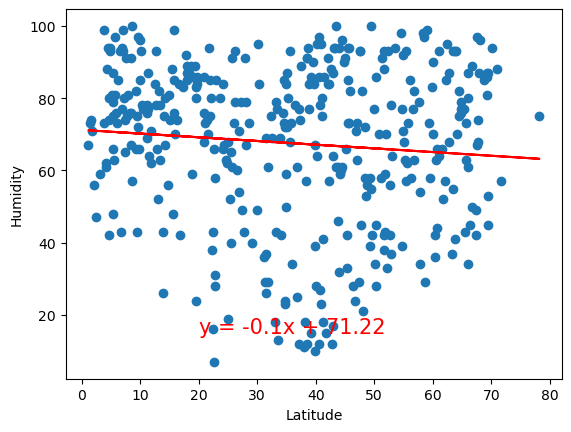

In [21]:
# Northern Hemisphere
y_values = northern_hemi_df["Humidity"]
x_values = northern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-squared is: -0.10844386652839247


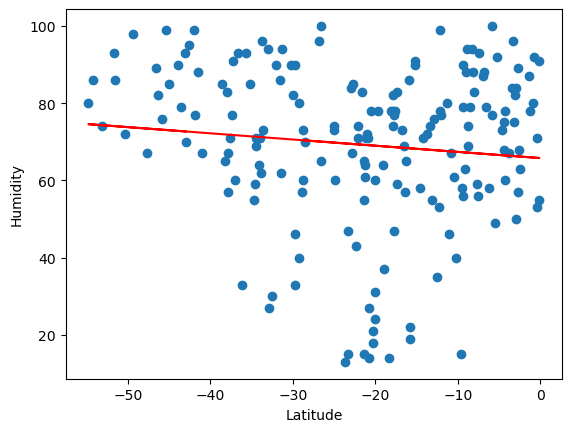

In [22]:
# Southern Hemisphere
y_values = southern_hemi_df["Humidity"]
x_values = southern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** the correlation between humidity and latitude is very weak for both the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.1105579049270911


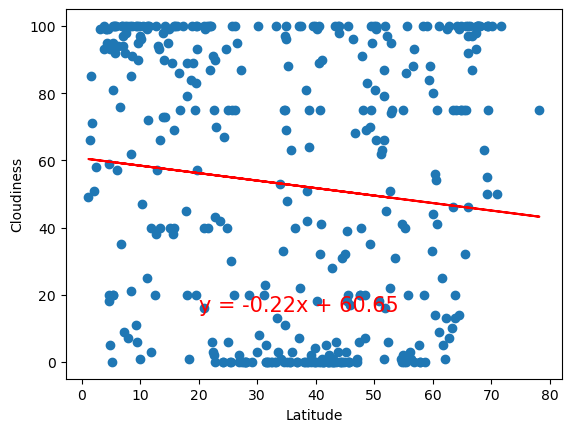

In [23]:
# Northern Hemisphere
y_values = northern_hemi_df["Cloudiness"]
x_values = northern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-squared is: -0.26529601128046815


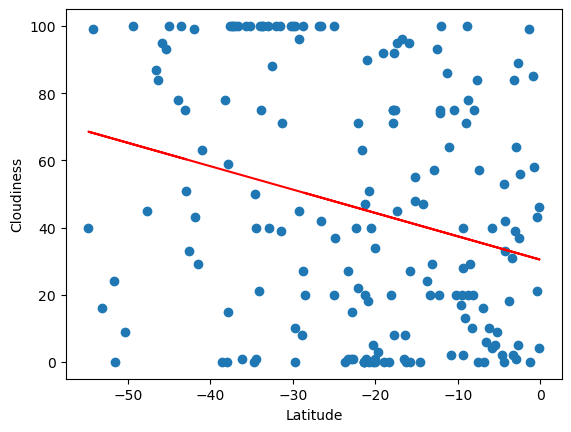

In [24]:
# Southern Hemisphere
y_values = southern_hemi_df["Cloudiness"]
x_values = southern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** there appears to be a slightly more negative correlation in the southern hemisphere between latitude and cloudiness yet it is still slight.  The northern hemisphere appears to have a weak correlation between latitutde and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.06147447490183271


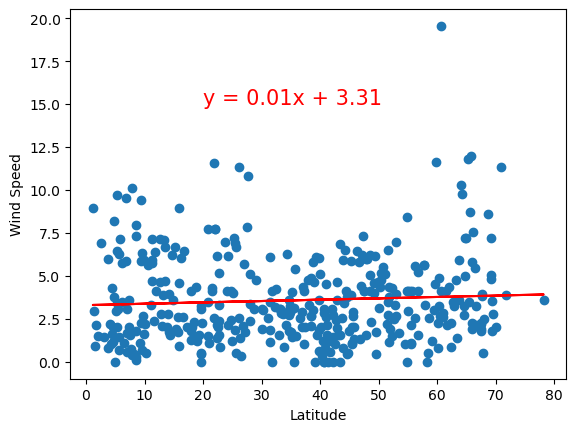

In [25]:
# Northern Hemisphere
y_values = northern_hemi_df["Wind Speed"]
x_values = northern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-squared is: 0.018640297443763217


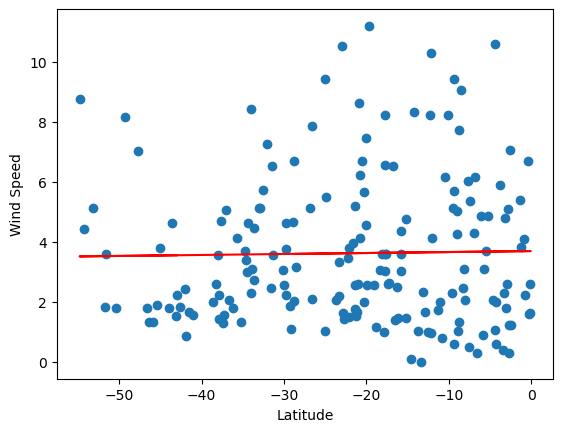

In [26]:
# Southern Hemisphere
y_values = southern_hemi_df["Wind Speed"]
x_values = southern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** there doesn't appear to be much of a correlation between latitude and wind speed for both the northern and southern hemispheres.